In [1]:
import numpy as np
import idx2numpy, torch
import matplotlib.pyplot as plt
import random

In [2]:
train_data = idx2numpy.convert_from_file('mnistdata/train-images.idx3-ubyte')
train_label = idx2numpy.convert_from_file('mnistdata/train-labels.idx1-ubyte')

test_data = idx2numpy.convert_from_file('mnistdata/t10k-images.idx3-ubyte')
test_label = idx2numpy.convert_from_file('mnistdata/t10k-labels.idx1-ubyte')

train_data = torch.as_tensor(train_data, dtype=torch.float32)
test_data = torch.as_tensor(test_data, dtype=torch.float32)
train_label = torch.as_tensor(train_label, dtype=torch.int64)
test_label = torch.as_tensor(test_label, dtype=torch.int64)

<ipython-input-2-0849367dca6f>:7: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  train_data = torch.as_tensor(train_data, dtype=torch.float32)


In [3]:
print(f"Test Image size:{test_data.shape}")
print(f"Test label: {test_label.shape}")
print(f"Train Image size:{train_data.shape}")
print(f"Train label: {train_label.shape}")

Test Image size:torch.Size([10000, 28, 28])
Test label: torch.Size([10000])
Train Image size:torch.Size([60000, 28, 28])
Train label: torch.Size([60000])


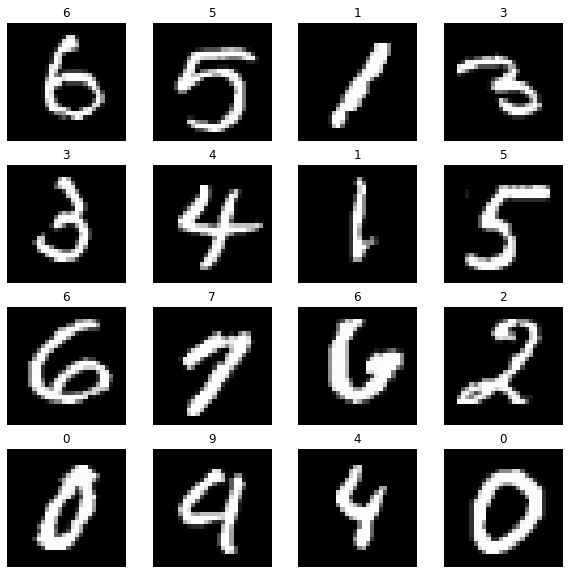

In [4]:
row, col = 4, 4
figure = plt.figure(figsize=(10,10))

for i in range(1, row*col +1):
    index = random.randint(1, len(train_data))
    image = train_data[index]
    label = train_label[index].item()
    figure.add_subplot(col, row, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image, cmap='gray')


In [5]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision

In [6]:
batch_size = 64
train_data_loader = DataLoader(train_data, batch_size= batch_size)
train_label_loader = DataLoader(train_label, batch_size= batch_size)
test_data_loader = DataLoader(test_data, batch_size= batch_size)
test_label_loader = DataLoader(test_label, batch_size= batch_size)

In [7]:
class NeuralNet(nn.Module):
    
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.forward_propogation = nn.Sequential(
            nn.Linear(28*28, 16, bias=False),
            nn.ReLU(),
            nn.Linear(16, 16, bias=False),
            nn.ReLU(),
            nn.Linear(16, 10, bias=False),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.flatten(x)
        output = self.forward_propogation(x)
        return output
        
model = NeuralNet()
print(model)

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (forward_propogation): Sequential(
    (0): Linear(in_features=784, out_features=16, bias=False)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=False)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=10, bias=False)
    (5): ReLU()
  )
)


In [8]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
def train(data_dataloader,label_dataloader , model, loss_fn, optimizer):
    size = len(data_dataloader.dataset)
    for batch, (x, y) in enumerate(zip(data_dataloader, label_dataloader)):
        pred = model(x)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch* len(x)
            print(f"Loss: {loss:>7f}   [{current:>5d}/{size:>5d}]")

In [10]:
def test(data_dataloader, label_dataloader, model):
    size = len(data_dataloader.dataset)
    model.eval()
    test_loss, correct = 0,0
    with torch.no_grad():
        for (x, y) in zip(data_dataloader, label_dataloader):
            pred = model(x)
            test_loss += loss_fn(pred, y).item()
    test_loss /= size
    print(f"Test Error: \n Avg loss: {test_loss:>8f} \n")
        

In [11]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n----------------------")
    train(train_data_loader, train_label_loader, model, loss_fn, optimizer)
    test(test_data_loader,  test_label_loader, model)

Epoch 1
----------------------
Loss: 8.083921   [    0/60000]
Loss: 1.388080   [ 6400/60000]
Loss: 1.478366   [12800/60000]
Loss: 1.075925   [19200/60000]
Loss: 1.384429   [25600/60000]
Loss: 1.137939   [32000/60000]
Loss: 0.728352   [38400/60000]
Loss: 1.001441   [44800/60000]
Loss: 0.830242   [51200/60000]
Loss: 0.867985   [57600/60000]
Test Error: 
 Avg loss: 0.013433 

Epoch 2
----------------------
Loss: 0.938528   [    0/60000]
Loss: 0.644904   [ 6400/60000]
Loss: 0.684371   [12800/60000]
Loss: 0.777446   [19200/60000]
Loss: 0.950780   [25600/60000]
Loss: 0.773566   [32000/60000]
Loss: 0.519896   [38400/60000]
Loss: 0.878024   [44800/60000]
Loss: 0.615687   [51200/60000]
Loss: 0.787555   [57600/60000]
Test Error: 
 Avg loss: 0.010638 

Epoch 3
----------------------
Loss: 0.775483   [    0/60000]
Loss: 0.462472   [ 6400/60000]
Loss: 0.567532   [12800/60000]
Loss: 0.656194   [19200/60000]
Loss: 0.854778   [25600/60000]
Loss: 0.690464   [32000/60000]
Loss: 0.484713   [38400/60000]


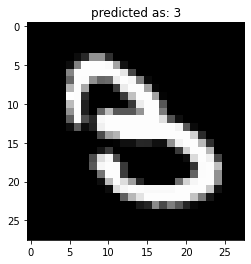

In [16]:
model.eval()
pred = 18
x, y = test_data[pred], test_label[pred]
x = torch.as_tensor(x.reshape(1, 28, 28), dtype = torch.float32)
with torch.no_grad():
    pred = model(x)
    x = x.reshape(28, 28)
    plt.imshow(x, cmap='gray')
    predicted, actual = pred[0].argmax(0), y
    plt.title(f"predicted as: {predicted}")